A **classification: survived / deceased** for classification -> Logistic Regression in python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**HANDLING MISSING DATA** 
<br> 
1. find out how many nan values (missing data) do we have. 

In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


this doesn't help rather we will use visualation concept in seaborn through which we will see missing values.
<br> 
Heatmap according to condition. 

<Axes: >

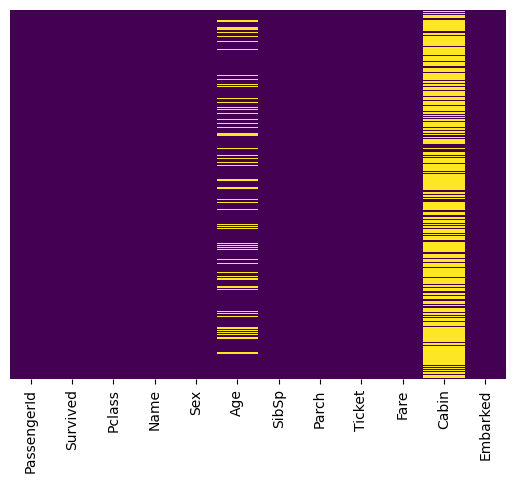

In [6]:
sns.heatmap(train.isnull(),yticklabels= False, cbar= False,  cmap = 'viridis')

we see roughly 20 percent of age value is missing. The proportion of Age missing is likely  small enough for reasonable replacement with some form of imputation. 
<br>
Looking at the cabin column, it looks like we just missing too much of that to do something at basic level. We'll probably drop this later, or change it to another feature like 'Cabin Known as 1 and 0' 
<br>
<br>
Let's continue on visualizing some more of the data!

<Axes: xlabel='Survived', ylabel='count'>

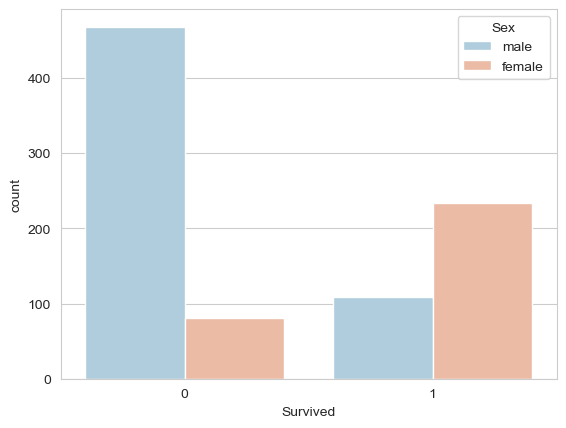

In [7]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = train, hue ='Sex', palette = 'RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

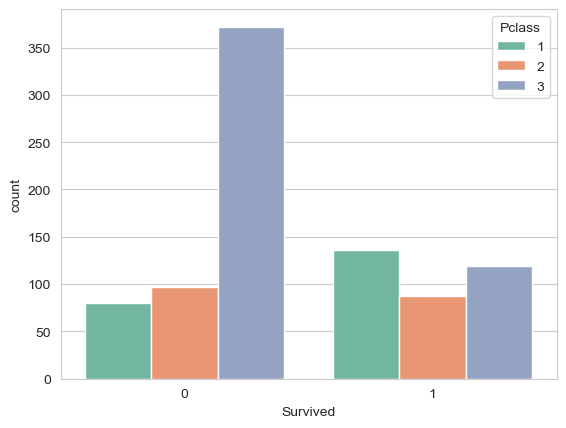

In [8]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived' ,data = train, hue = 'Pclass', palette = 'Set2')

we are going to see whether the age data follows a normal distribution or not.
<br>


C:\Users\AK\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


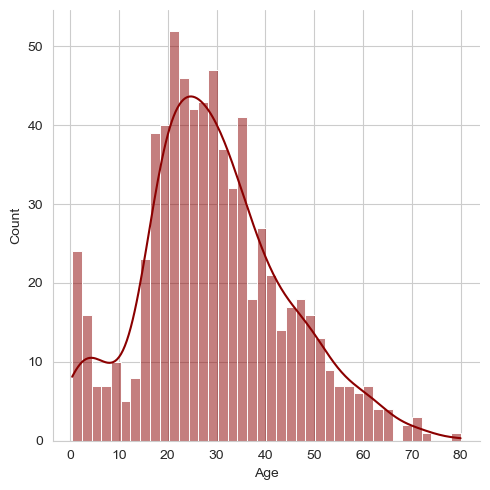

In [9]:
sns.displot(train['Age'].dropna(), kde = True, color = 'darkred', bins = 40)

<Axes: xlabel='SibSp', ylabel='count'>

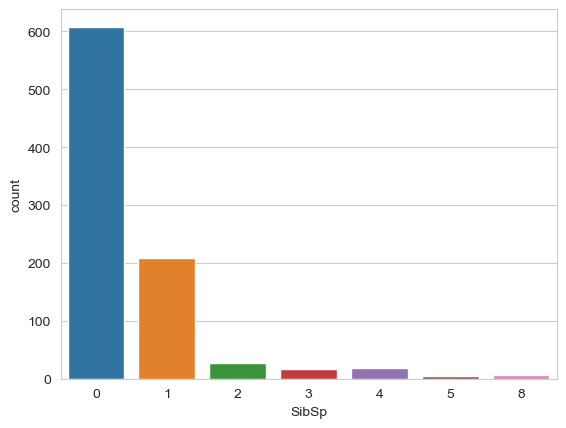

In [10]:
sns.countplot(x = 'SibSp' , data = train)

<Axes: >

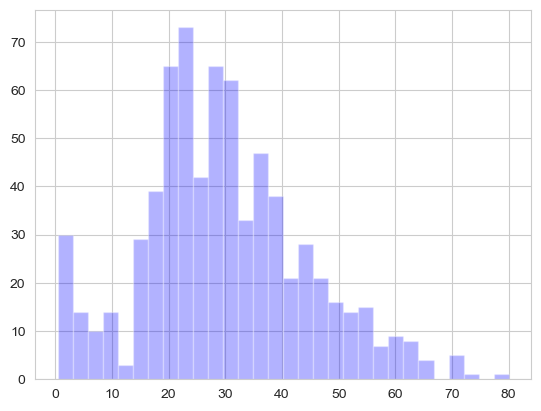

In [11]:
train['Age'].hist(bins = 30, color = 'blue', alpha = 0.3)

<Axes: xlabel='SibSp', ylabel='count'>

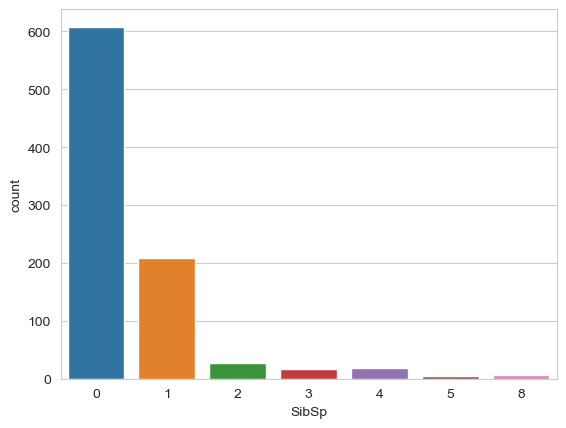

In [12]:
sns.countplot(x = 'SibSp', data = train)

<Axes: >

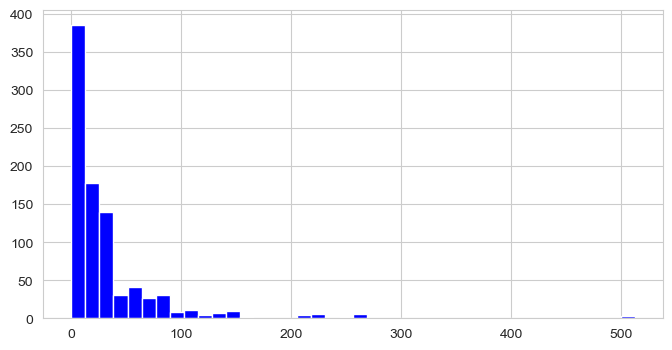

In [13]:
train['Fare'].hist(color = 'blue', bins = 40, figsize = (8, 4))

Now coming to the main part. How do we handle the NULL values. 

## Data Cleaning  

we want to fill in missing age data instead of just dropping the missing age data rows. one way to do this is by filling in  the mean age of all the passengers (imputation).
<br>
However we can be smarter about this and check the average age by passenger class. For Example: 

<Axes: xlabel='Pclass', ylabel='Age'>

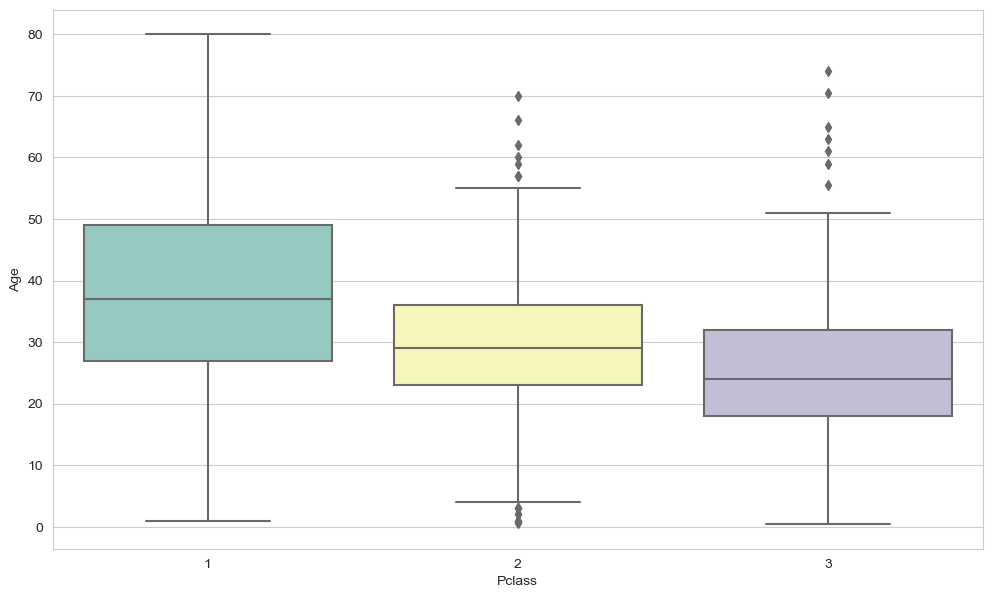

In [14]:
plt.figure(figsize=(12,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train , palette = 'Set3')

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age): 
        if Pclass == 1: 
            return 37
        elif Pclass == 2 :
            return 29
        else : 
            return 24 
        
    else : 
        return Age; 

In [16]:
train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)
train = train.drop(['Cabin'], axis = 1)


<Axes: >

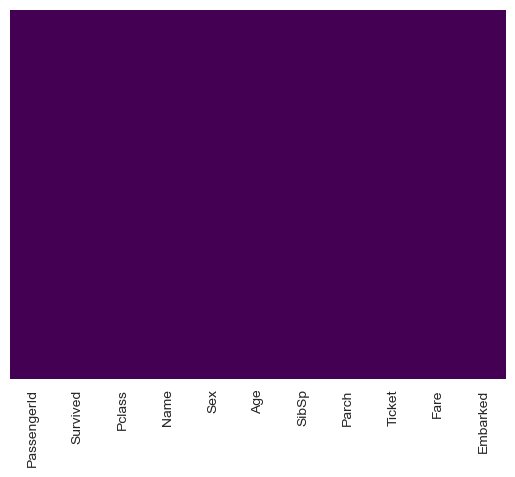

In [18]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

we see that the cabin column holds no importance to our goals, so we can drop it.  

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to take in those. 

In [20]:
pd.get_dummies(['Embarked'], drop_first = True).head()

""
0


In [21]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies( train['Embarked'], drop_first = True)

In [22]:
train = train.drop(['Sex','Embarked', 'Name', 'Ticket'], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [23]:
train = pd.concat([train, sex,  embark], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


## Building a Logistic Regression Model  

Let's start by  splitting our data into a training set and test set 

In [26]:
train.drop(['Survived'], axis = 1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [27]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(train.drop('Survived', axis = 1 ),train['Survived'], test_size = 0.30, random_state = 101)

In [30]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

C:\Users\AK\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
predictions  = logmodel.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix 

In [36]:
accuracy = confusion_matrix(Y_test, predictions)

In [37]:
accuracy

array([[134,  20],
       [ 42,  72]], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy = accuracy_score(Y_test, predictions)
accuracy

0.7686567164179104

In [41]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)